# CYBERSECURITY INTERNSHIP 
Data Leakage Prevention (DLP) : Develop AI models to detect and prevent unauthorized access and transfer of sensitive data


In [1]:
#Model Selection and Implementation Approach

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
# Load the dataset
file_path = 'insurance.csv'
data = pd.read_csv(file_path)

In [4]:
print(data.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [5]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [6]:
# Define feature columns and target column
X = data.drop(columns='expenses')
y = data['expenses']

In [7]:
# Print the shapes of X and y
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [8]:
# Define preprocessing steps
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']


In [9]:
# Print the unique values in the categorical features to ensure they are correct
print(X['sex'].unique())
print(X['smoker'].unique())
print(X['region'].unique())
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Print the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [12]:
#Step 4: Model Definition and Hyperparameter Tuning

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [14]:
# Define the model
rf = RandomForestRegressor(random_state=42)


In [15]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Reduced for faster execution
    'max_depth': [None, 10],    # Reduced for faster execution
    'min_samples_split': [2, 5]
}


In [16]:
# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf)
])

In [17]:
# Define the GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


In [18]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [19]:
#5. Evaluate the Model

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [21]:
# Get predictions
y_pred = pipeline.predict(X_test)

In [22]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [23]:
print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  21313509.94979983
RMSE:  4616.655710554972


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [50],  # Start with a smaller number for quick testing
    'regressor__max_depth': [10],     # Use only a few options
    'regressor__min_samples_split': [2]
}

In [26]:
# Define the GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


In [27]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10],
                         'regressor__min_samples_split': [2],
                         'regressor__n_estimators': [50]},
             scoring='neg_mean_squared_error')

In [28]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}


In [29]:
# Assuming y_test and y_pred are already defined from the previous code snippet

# Analyze model performance
print("Model Performance:")
print("MSE: ", mse)
print("RMSE: ", rmse)

Model Performance:
MSE:  21313509.94979983
RMSE:  4616.655710554972


In [30]:
#7. Implement K-Fold Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Define the cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')


In [33]:
# Print the cross-validation scores
print("Cross-validation Scores (MSE):", -scores)
print("Mean Cross-validation MSE:", -scores.mean())

Cross-validation Scores (MSE): [22665272.51761339 29338791.25426767 18510614.23565958 25239284.40606262
 22084171.55635587]
Mean Cross-validation MSE: 23567626.793991826


In [34]:
#8. Perform Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Define a more comprehensive parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}


In [37]:
# Initialize GridSearchCV with updated parameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [38]:
# Fit GridSearchCV
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [39]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_


In [40]:
print("Best parameters found:", best_params)
print("Best MSE score:", best_score)

Best parameters found: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best MSE score: 21755166.309537865


In [41]:
#The scoring parameter: defining model evaluation rules

In [42]:

from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
X, y = datasets.load_iris(return_X_y=True)
clf = svm.SVC(random_state=0)
cross_val_score(clf, X, y, cv=5, scoring='recall_macro')

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [43]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=ftwo_scorer, cv=5)

In [44]:
 #Implementing our own scoring object

In [45]:
scoring = ['accuracy', 'precision']

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
           'prec': 'precision'}

In [47]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
# A sample toy binary classification dataset
X, y = datasets.make_classification(n_classes=2, random_state=0)
svm = LinearSVC(random_state=0)
def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(svm, X, y, cv=5,
                            scoring=confusion_matrix_scorer)
# Getting the test set true positive scores
print(cv_results['test_tp'])
# Getting the test set false negative scores
print(cv_results['test_fn'])

[10  9  8  7  8]
[0 1 2 3 2]


In [48]:
#Accuracy score

In [49]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
accuracy_score(y_true, y_pred, normalize=False)

2

In [50]:
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.5

In [51]:
#Top-k accuracy score

In [52]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score
y_true = np.array([0, 1, 2, 2])
y_score = np.array([[0.5, 0.2, 0.2],
                    [0.3, 0.4, 0.2],
                    [0.2, 0.4, 0.3],
                    [0.7, 0.2, 0.1]])
top_k_accuracy_score(y_true, y_score, k=2)
# Not normalizing gives the number of "correctly" classified samples
top_k_accuracy_score(y_true, y_score, k=2, normalize=False)

3

In [53]:
#Cohen’s kappa

In [54]:
from sklearn.metrics import cohen_kappa_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)

0.4285714285714286

In [55]:
#Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [57]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
confusion_matrix(y_true, y_pred, normalize='all')

array([[0.25 , 0.125],
       [0.25 , 0.375]])

In [58]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

In [59]:
#Classification report

In [60]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))



              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



In [61]:
#Hamming loss

In [62]:
from sklearn.metrics import hamming_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
hamming_loss(y_true, y_pred)

0.25

In [63]:
hamming_loss(np.array([[0, 1], [1, 1]]), np.zeros((2, 2)))

0.75

In [64]:
#Precision, recall and F-measures

In [65]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
metrics.precision_score(y_true, y_pred)
metrics.recall_score(y_true, y_pred)
metrics.f1_score(y_true, y_pred)
metrics.fbeta_score(y_true, y_pred, beta=0.5)
metrics.fbeta_score(y_true, y_pred, beta=1)
metrics.fbeta_score(y_true, y_pred, beta=2)
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5)




(array([0.66666667, 1.        ]),
 array([1. , 0.5]),
 array([0.71428571, 0.83333333]),
 array([2, 2], dtype=int64))

In [66]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, threshold = precision_recall_curve(y_true, y_scores)
precision
recall
threshold
average_precision_score(y_true, y_scores)

0.8333333333333333

In [67]:
#Multiclass and multilabel classification

In [68]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
metrics.precision_score(y_true, y_pred, average='macro')
metrics.recall_score(y_true, y_pred, average='micro')
metrics.f1_score(y_true, y_pred, average='weighted')
metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)

(array([0.66666667, 0.        , 0.        ]),
 array([1., 0., 0.]),
 array([0.71428571, 0.        , 0.        ]),
 array([2, 2, 2], dtype=int64))

In [69]:
metrics.recall_score(y_true, y_pred, labels=[1, 2], average='micro')
# excluding 0, no labels were correctly recalled

0.0

In [70]:
metrics.precision_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro')

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.16666666666666666

In [71]:
#Receiver operating characteristic (ROC)


In [72]:
import numpy as np
from sklearn.metrics import roc_curve
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
fpr
tpr
thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

In [73]:
#Binary case

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
clf.classes_

array([0, 1])

In [75]:
y_score = clf.predict_proba(X)[:, 1]
roc_auc_score(y, y_score)

0.9946488029173934

In [76]:
roc_auc_score(y, clf.decision_function(X))

0.9946488029173934

In [77]:
#Brier score loss

In [78]:
import numpy as np
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.4])
y_pred = np.array([0, 1, 1, 0])
brier_score_loss(y_true, y_prob)
brier_score_loss(y_true, 1 - y_prob, pos_label=0)
brier_score_loss(y_true_categorical, y_prob, pos_label="ham")
brier_score_loss(y_true, y_prob > 0.5)

0.0

In [79]:
#Validation curve

In [80]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC



In [81]:
np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 3),
)
train_scores
valid_scores

array([[0.9       , 0.9       , 0.9       , 0.96666667, 0.9       ],
       [0.9       , 0.83333333, 0.96666667, 0.96666667, 0.93333333],
       [1.        , 0.93333333, 1.        , 1.        , 0.9       ]])

In [82]:
# Visualizations

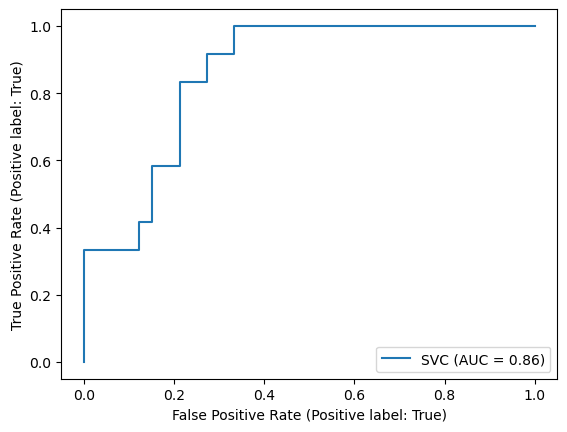

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
y = y == 2  # make binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

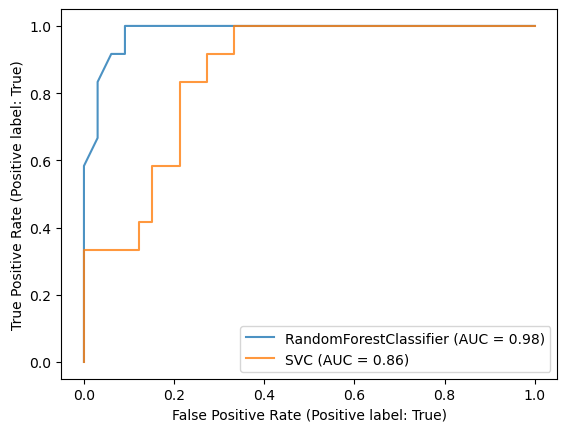

In [84]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)